In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv('wdbc.data', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Column names not included: either enter in manually, or something else. gpt said to scrape from the website
columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
df.columns = columns


In [5]:
#df.to_csv('wdbc with_headers.csv', index=False)

### Checking cleanliness and integrity
dtypes, duplications, missing values etc.

In [6]:
print(df.isna().sum()) #none
print(df.dtypes) # all okay
print(df.duplicated().sum()) # none

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
id                           int64
diagnosis               

<BarContainer object of 2 artists>

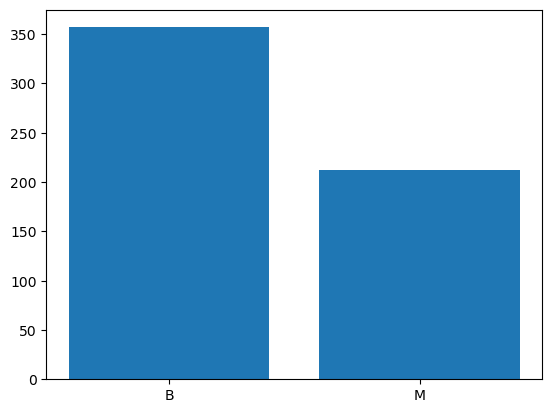

In [7]:
diagnosed = df.diagnosis.value_counts()
plt.bar(diagnosed.index, diagnosed.values)
# seems a little skewed. 

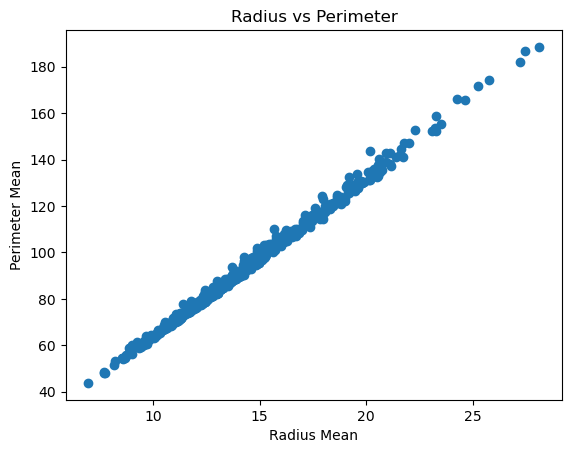

R^2 value for radius and perimeter: 1.00
0.0


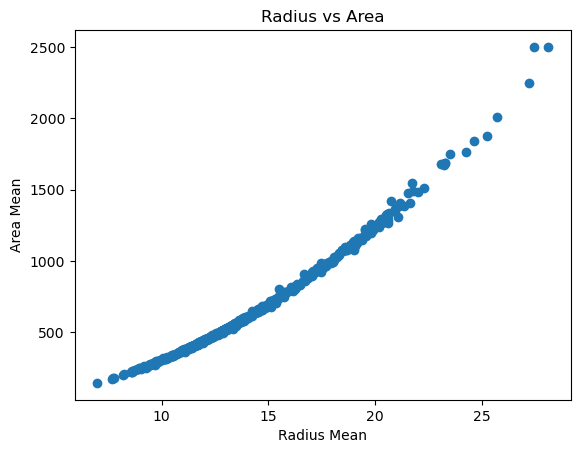

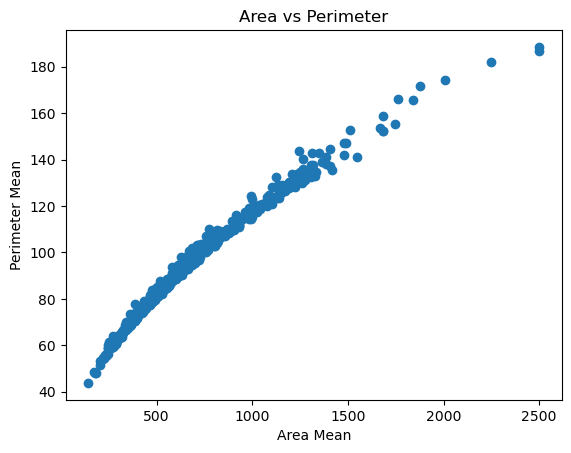

In [ ]:
from scipy.stats import pearsonr
# Area, perimeter and radius should be correlated, lets check.
plt.scatter(df['radius_mean'], df['perimeter_mean'])
plt.title('Radius vs Perimeter')
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.show()  
plt.close()
corr_radius_mean, p =  pearsonr(df.radius_mean, df.perimeter_mean)
print(f'pearson value for radius and perimeter: {corr_radius_mean:.2f}') # literally perfect correlation 


plt.scatter(df['radius_mean'], df['area_mean'])
plt.title('Radius vs Area')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()
plt.close()

plt.scatter(df['area_mean'], df['perimeter_mean'])
plt.title('Area vs Perimeter')
plt.xlabel('Area Mean')
plt.ylabel('Perimeter Mean')
plt.show()
plt.close()